<a href="https://colab.research.google.com/github/jan-1995/Classical_Networks_Pytorch/blob/main/Pytorch_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**LeNet5**
1. In this article we will be building from scratch LeNet by Yan Lecunn and his team. Lenet was engineered for low resolution black and white images recognition wiht the image size of 32 x 32.

2. Convolved into 28 by 28 by 6 and so  on.

3. At the time, it was serious engineering and took 3 months for implementation.

4. This was for hand written recognition.

5. The **data** which we will be looking at is the mnist data, originally designed for this project by AT&T.

6.  Centered and scaled images 60,000 training and 10,000 testing with the resolution of 28 by 28, realistic obtained by looking at letters and segmentuing them appropriately. A project by AT&T. 
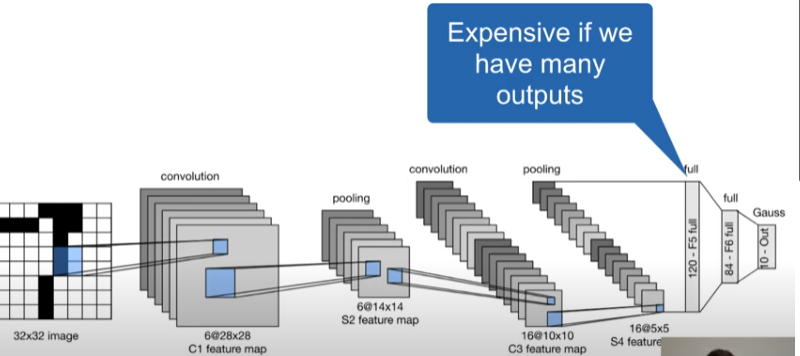 
 Now if you look at the netwrok archi, it wasnt a big deal beacause images werent high dimensional, toward the output side u have fc layers which can be expensive.
7. LeNet5 is called LeNet because it has 5 layers to it with two convolutional and 3 fully connected layers

##**Data Acceptance**
LeNet5 accepts as input a greyscal image of size 32x32, indicating that the architecure is not suitable for images which have rgb channels. So the input image should contain just one channel. After this we start with our convolutional layer


##**Importing the Libraries**

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

##Define relevant variables for the ML task

batch_size=64
num_classes=10
learning_rate=0.001
num_epochs=10

##device will determine whether to run the training on CPU or the GPU.
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

##**Loading the Dataset**
Let's understand the code:

1. Firstly the LeNet5 accepts the input to be 32x32 and the MNIST images are 28x28. Fix this by resizing and normalizing them using the pre-calculated mean and standard deviation (available online), and finally storing them as tensors.

2. We set download=True incase the data is not already downloaded.

3. Next, we make use of data loaders. This might not affect the performance in the case of a small dataset like MNIST, but it can really impede the performance in case of large datasets and is generally considered a good practice. Data loaders allow us to iterate through the data in batches, and the data is loaded while iterating and not at once in start.

4. We specify the batch size and shuffle the dataset when loading so that every batch has some variance in the types of labels it has. This will increase the efficacy of our eventual model.

In [2]:
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

##**ARCHITECTURE**

I'll explain the code linearly:

1. In PyTorch,  we define a neural network by creating a class that inherits from nn.Module as it contains many of the methods that we will need to utilize.

2. There are two main steps after that. First is initializing the layers that we are going to use in our CNN inside __init__ , and the other is to define the sequence in which those layers will process the image. This is defined inside the forward function.

3. For the architecture itself, we first define the convolutional layers using the nn.Conv2D function with the appropriate kernel size and the input/output channels. We also apply max pooling using nn.MaxPool2D function. The nice thing about PyTorch is that we can combine the convolutional layer, activation function, and max pooling into one single layer (they will be separately applied, but it helps with organization) using the nn.Sequential function.

4. Then we define the fully connected layers. Note that we can use nn.Sequential here as well and combine the activation functions and the linear layers, but I wanted to show that either one is possible.

5. Finally, our last layer outputs 10 neurons which are our final predictions for the digits.

In [5]:
#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [6]:
model = LeNet5(num_classes).to(device)

#Setting the loss function
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_loader)

In [7]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(images)
        loss = cost(outputs, labels)
        	
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        		
        if (i+1) % 400 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10], Step [400/938], Loss: 0.1194
Epoch [1/10], Step [800/938], Loss: 0.0670
Epoch [2/10], Step [400/938], Loss: 0.0142
Epoch [2/10], Step [800/938], Loss: 0.0047


TypeError: ignored

In [8]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
	 

Accuracy of the network on the 10000 test images: 98.71 %


Note that MNIST dataset is quite basic and small for today's standards, and similar results are hard to get for other datasets. Nonetheless, it's a good starting point when learning deep learning and CNNs.